# Clustering and Dimensionality Reduction

## 1. Clustering

### 1.1 K-Means Clustering

**Explanation:**
K-Means is a type of unsupervised learning algorithm used for clustering. It partitions the data into K distinct clusters based on the distance to the centroid of a cluster.
- **Step 1:** Initialize K centroids randomly.
- **Step 2:** Assign each data point to the nearest centroid.
- **Step 3:** Recalculate the centroids as the mean of all data points assigned to each centroid.
- **Step 4:** Repeat Steps 2 and 3 until the centroids do not change significantly.

**Simple Dataset:**

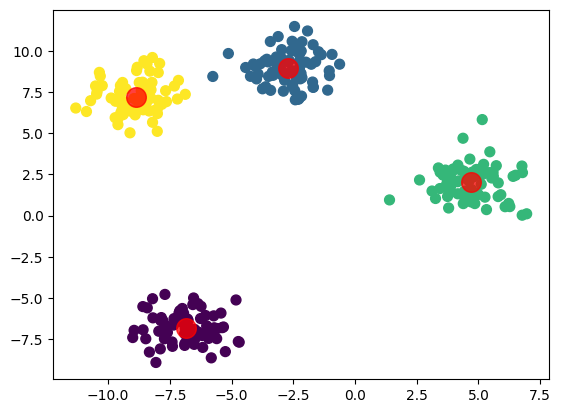

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Create a synthetic dataset
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply K-Means
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75);
plt.show()

**Time Series Dataset:**
To work with time series data similar to IMU data, we need to preprocess and window the data. We'll simulate a dataset with three activities: walking, running, and standing.

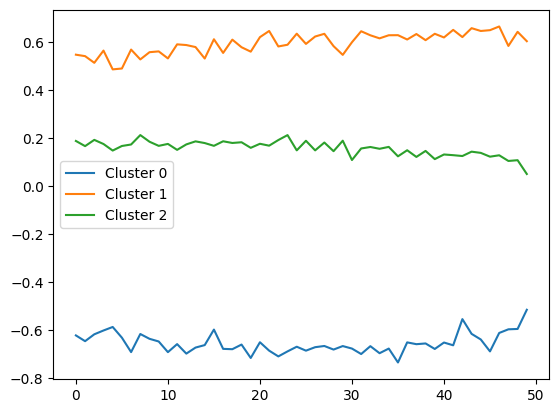

In [2]:
# Simulate IMU data
np.random.seed(42)

# Parameters
n_samples = 1000
n_features = 6  # 3 accelerometer + 3 gyroscope
n_activities = 3  # walking, running, standing

# Generate synthetic IMU data
imu_data = np.zeros((n_samples, n_features))

# Walking: low-frequency sinusoidal data
imu_data[:333, :3] = np.sin(np.linspace(0, 10, 333)).reshape(-1, 1) * np.random.normal(1, 0.1, (333, 3))
imu_data[:333, 3:] = np.sin(np.linspace(0, 10, 333)).reshape(-1, 1) * np.random.normal(1, 0.1, (333, 3))

# Running: high-frequency sinusoidal data
imu_data[333:666, :3] = np.sin(np.linspace(0, 50, 333)).reshape(-1, 1) * np.random.normal(1, 0.1, (333, 3))
imu_data[333:666, 3:] = np.sin(np.linspace(0, 50, 333)).reshape(-1, 1) * np.random.normal(1, 0.1, (333, 3))

# Standing: low variance noise
imu_data[666:, :3] = np.random.normal(0, 0.1, (334, 3))
imu_data[666:, 3:] = np.random.normal(0, 0.1, (334, 3))

# Apply K-Means on windowed IMU data
# Define window size and step size
window_size = 50
step_size = 25

# Create windows
windows = []
for start in range(0, n_samples - window_size + 1, step_size):
    window = imu_data[start:start + window_size].flatten()
    windows.append(window)
windows = np.array(windows)

# Apply K-Means on the windowed data
kmeans_imu = KMeans(n_clusters=n_activities)
kmeans_imu.fit(windows)
y_kmeans_imu = kmeans_imu.predict(windows)

# Plot the cluster centers
for i in range(n_activities):
    plt.plot(kmeans_imu.cluster_centers_[i][:50], label=f'Cluster {i}')
plt.legend()
plt.show()

### 1.2 Agglomerative Hierarchical Clustering

**Explanation:**
Agglomerative Hierarchical Clustering is a type of clustering algorithm that builds a hierarchy from the bottom up. It starts with each data point as its own cluster and merges the closest pairs of clusters until only one cluster remains.

Linkage criteria:
- **Single linkage:** minimum distance between clusters
- **Complete linkage:** maximum distance between clusters
- **Average linkage:** average distance between clusters

**Simple Dataset:**

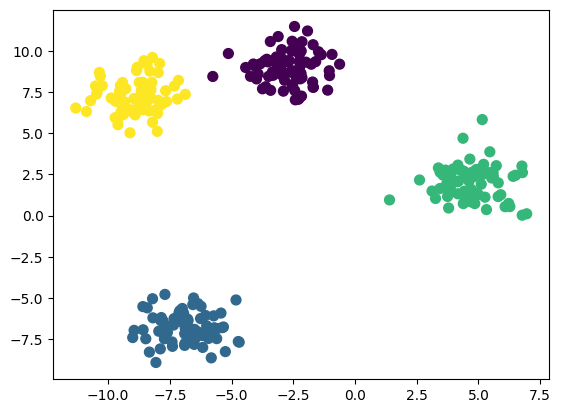

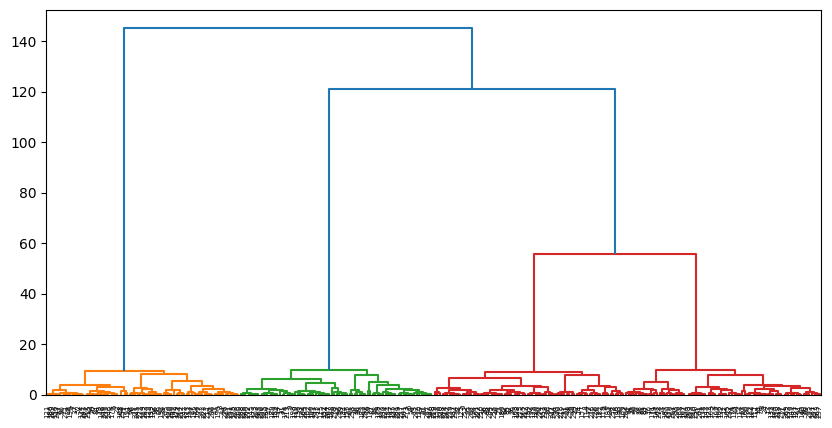

In [3]:
# Import necessary libraries
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4)
y_agglo = agglo.fit_predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_agglo, s=50, cmap='viridis')
plt.show()

# Plot the dendrogram
Z = linkage(X, 'ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

**Time Series Dataset:**
Now let's apply Agglomerative Clustering to the windowed IMU data.

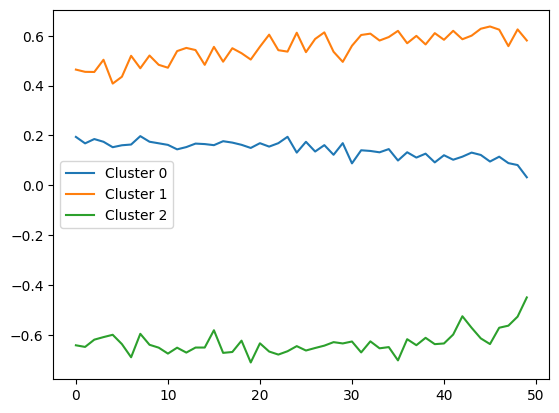

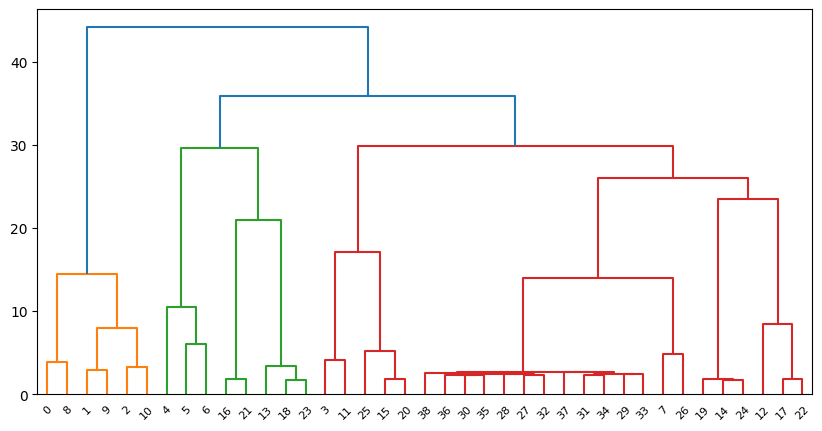

In [4]:
# Apply Agglomerative Clustering on the windowed IMU data
agglo_imu = AgglomerativeClustering(n_clusters=n_activities)
y_agglo_imu = agglo_imu.fit_predict(windows)

# Plot the clusters
for i in range(n_activities):
    plt.plot(np.mean(windows[y_agglo_imu == i], axis=0)[:50], label=f'Cluster {i}')
plt.legend()
plt.show()

# Plot the dendrogram
Z_imu = linkage(windows, 'ward')
plt.figure(figsize=(10, 5))
dendrogram(Z_imu)
plt.show()

### 1.3 DBSCAN

**Explanation:**
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together points that are closely packed together, marking as outliers the points that lie alone in low-density regions.
- **Core points:** Points that have at least a minimum number of other points within a given radius.
- **Border points:** Points that have fewer than the minimum number of points within the radius but are in the neighborhood of a core point.
- **Noise points:** Points that are neither core points nor border points.

**Simple Dataset:**

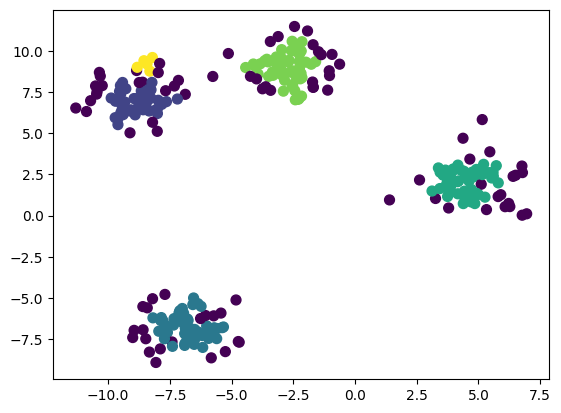

In [5]:
# Import necessary library
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='viridis')
plt.show()

**Time Series Dataset:**
Now let's apply DBSCAN to the windowed IMU data.

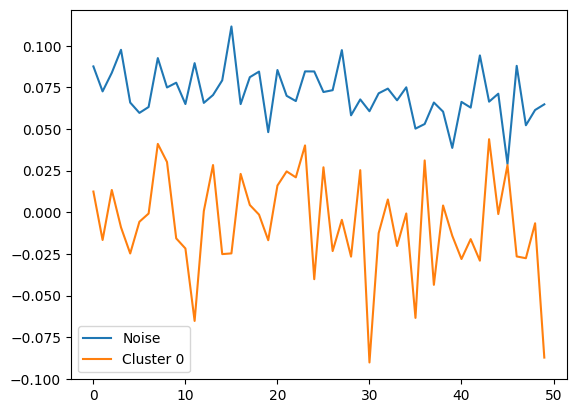

In [6]:
# Apply DBSCAN on the windowed IMU data
dbscan_imu = DBSCAN(eps=3, min_samples=5)
y_dbscan_imu = dbscan_imu.fit_predict(windows)

# Plot the clusters
for i in np.unique(y_dbscan_imu):
    if i == -1:
        label = 'Noise'
    else:
        label = f'Cluster {i}'
    plt.plot(np.mean(windows[y_dbscan_imu == i], axis=0)[:50], label=label)
plt.legend()
plt.show()

## 2. Dimensionality Reduction

### 2.1 PCA (Principal Component Analysis)

**Explanation:**
PCA is a technique used to emphasize variation and bring out strong patterns in a dataset. It does this by transforming the data into a set of orthogonal (uncorrelated) variables called principal components.
- **Step 1:** Standardize the data.
- **Step 2:** Compute the covariance matrix.
- **Step 3:** Calculate the eigenvalues and eigenvectors of the covariance matrix.
- **Step 4:** Sort the eigenvalues and select the top k eigenvectors.
- **Step 5:** Transform the original data to the new k-dimensional space.

**Simple Dataset:**

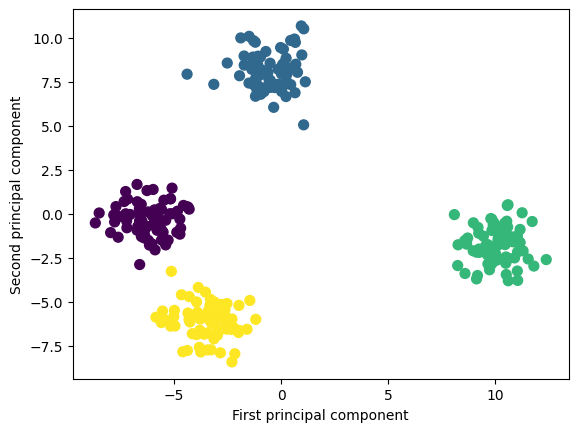

In [7]:
# Import necessary library
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the PCA result
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=50, cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

**Time Series Dataset:**
Now let's apply PCA to the windowed IMU data.

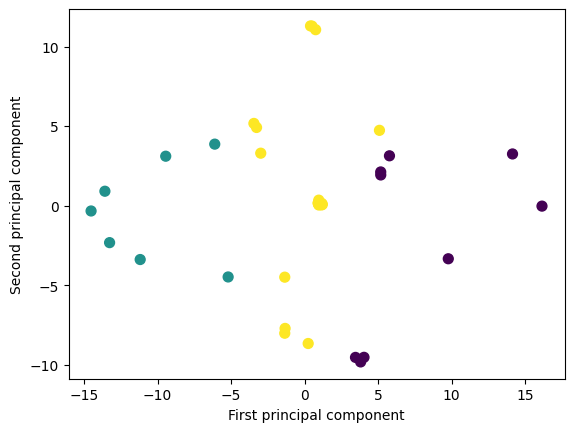

In [8]:
# Apply PCA on the windowed IMU data
pca_imu = PCA(n_components=2)
windows_pca = pca_imu.fit_transform(windows)

# Plot the PCA result
plt.scatter(windows_pca[:, 0], windows_pca[:, 1], c=y_kmeans_imu, s=50, cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

### 2.2 t-SNE (t-Distributed Stochastic Neighbor Embedding)

**Explanation:**
t-SNE is a technique for dimensionality reduction that is particularly well-suited for the visualization of high-dimensional datasets. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.
- **Step 1:** Compute pairwise similarity in the high-dimensional space.
- **Step 2:** Compute pairwise similarity in the low-dimensional space.
- **Step 3:** Optimize the low-dimensional points to minimize the divergence between the two sets of pairwise similarities.

**Simple Dataset:**

/Users/konak/opt/anaconda3/envs/note/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/konak/opt/anaconda3/envs/note/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


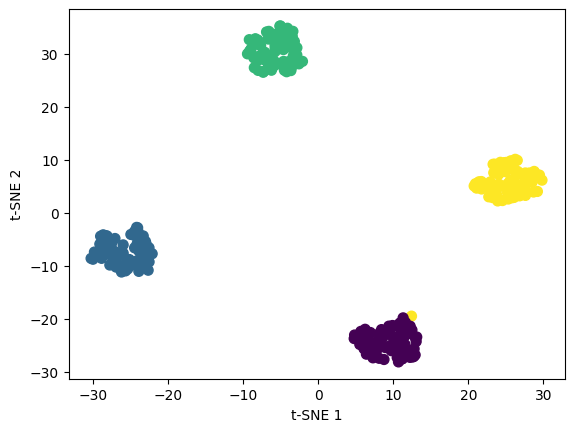

In [9]:
# Import necessary library
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Plot the t-SNE result
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, s=50, cmap='viridis')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

**Time Series Dataset:**
Now let's apply t-SNE to the windowed IMU data.

/Users/konak/opt/anaconda3/envs/note/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/konak/opt/anaconda3/envs/note/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


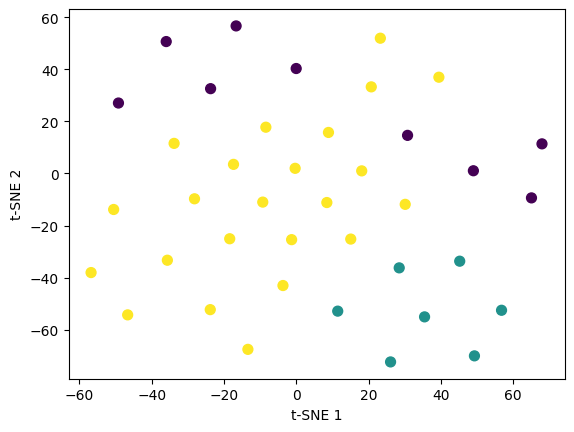

In [10]:
# Apply t-SNE on the windowed IMU data
tsne_imu = TSNE(n_components=2)
windows_tsne = tsne_imu.fit_transform(windows)

# Plot the t-SNE result
plt.scatter(windows_tsne[:, 0], windows_tsne[:, 1], c=y_kmeans_imu, s=50, cmap='viridis')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()